In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings

data = pd.read_csv('C:/Users/gate/OneDrive/Desktop/walmart-sales-dataset-of-45stores.csv')
print('Shape of dataset= ', data.shape,"\n\n")
print(data.head(),"\n\n")
print(data.tail(),"\n\n")
print(data.info(),"\n\n") # to show types
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')  # turn date from object to datetime type

Shape of dataset=  (6435, 8) 


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106   


      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
64

In [34]:
# Cleaning
data.duplicated()
data.drop_duplicates()
print(data.info(),"\n\n")  # No duplication
print(data.isnull().sum(),"\n\n")
print(data.isnull().sum().sum(),"\n\n") # No null
# To know if there is element not a flag not 0 or 1
print(data[data.Holiday_Flag < 0 ])  
data[data.Holiday_Flag > 1 ] # clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None 


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64 


0 


Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


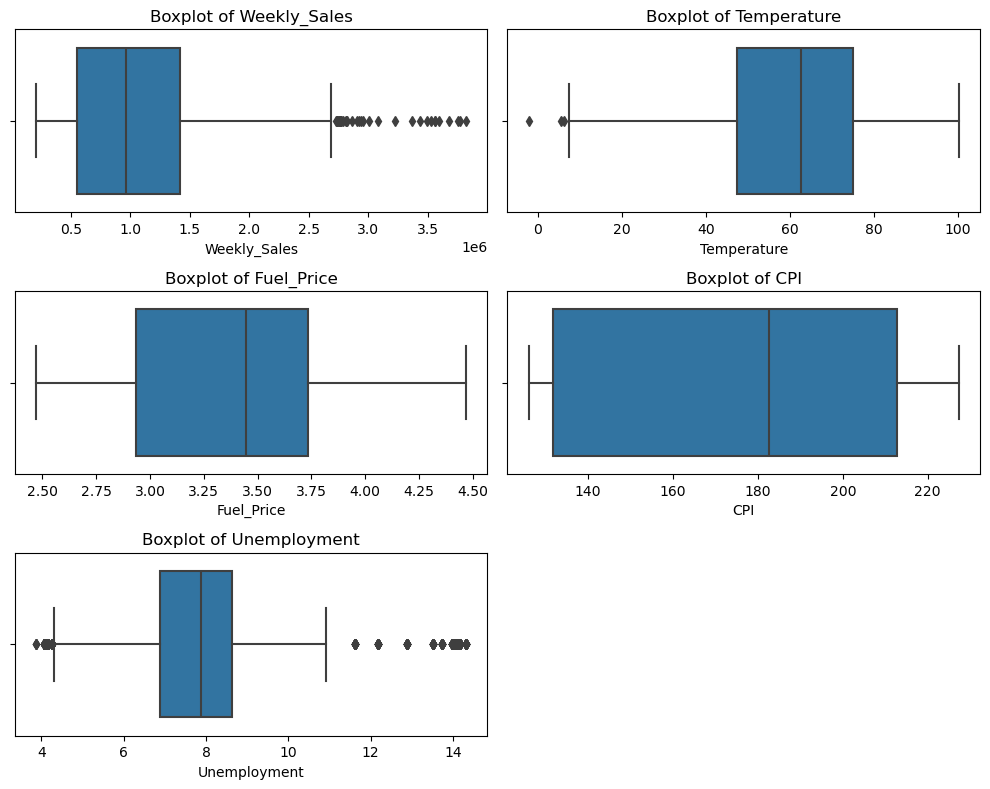

In [35]:
# Show outliers by boxplot
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
sns.boxplot(x=data['Weekly_Sales'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Weekly_Sales')

sns.boxplot(x=data['Temperature'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Temperature')

sns.boxplot(x=data['Fuel_Price'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Fuel_Price')

sns.boxplot(x=data['CPI'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of CPI')

sns.boxplot(x=data['Unemployment'], ax=axs[2, 0])
axs[2, 0].set_title('Boxplot of Unemployment')

axs[2, 1].axis('off')
plt.tight_layout()
plt.show()

In [36]:
# There is some outliers in Unemployment and Temperature.
# Function to obtain indices of outliers
def outlier_indices(dataframe_column):
  Q1 = dataframe_column.quantile(0.25)
  Q3 = dataframe_column.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe_column[(dataframe_column > upper_end) | (dataframe_column < lower_end)]
  return outlier
print("outliers of Weekly_Sales:\n" , outlier_indices(data["Weekly_Sales"]),"\n\n")
print("outliers of Temperature:\n" , outlier_indices(data["Temperature"]),"\n\n")
print("outliers of Unemployment:\n" , outlier_indices(data["Unemployment"]),"\n\n")

outliers of Weekly_Sales:
 189     3436007.68
241     3224369.80
471     2789469.45
474     2740057.14
475     3526713.39
523     3004702.33
526     2771397.17
527     3676388.98
761     2727575.18
1329    2939946.38
1332    2811646.85
1333    3749057.69
1381    2950198.64
1385    3487986.89
1758    2766400.05
1761    2771646.81
1762    3595903.20
1810    2864170.61
1813    2760346.71
1814    3556766.03
1901    2921709.71
1904    2762861.41
1905    3818686.45
1957    3369068.99
2759    2811634.04
2761    2752122.08
2762    2819193.17
2763    3766687.43
2811    2906233.25
2814    2762816.65
2815    3555371.03
3192    2734277.10
3764    3078162.08
3816    2739019.75
Name: Weekly_Sales, dtype: float64 


outliers of Temperature:
 910    -2.06
2336    6.23
3626    5.54
Name: Temperature, dtype: float64 


outliers of Unemployment:
 555     4.077
556     4.077
557     4.077
558     4.077
559     4.077
        ...  
5715    4.156
5716    4.145
5717    4.145
5718    4.145
5719    4.145
Name: 

Store                             7
Date            2011-02-04 00:00:00
Weekly_Sales              558027.77
Holiday_Flag                      0
Temperature                   -2.06
Fuel_Price                    3.011
CPI                      191.762589
Unemployment                  8.818
Name: 910, dtype: object
     Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
905      7 2010-12-31     729572.08             1        13.76       2.829   
906      7 2011-01-07     661163.94             0        10.09       2.882   
907      7 2011-01-14     547384.90             0        11.32       2.911   
908      7 2011-01-21     521539.46             0        25.40       2.973   
909      7 2011-01-28     513372.17             0        10.11       3.008   
910      7 2011-02-04     558027.77             0        -2.06       3.011   
911      7 2011-02-11     559903.13             1        10.24       3.037   
912      7 2011-02-18     572387.47             0        17.30 

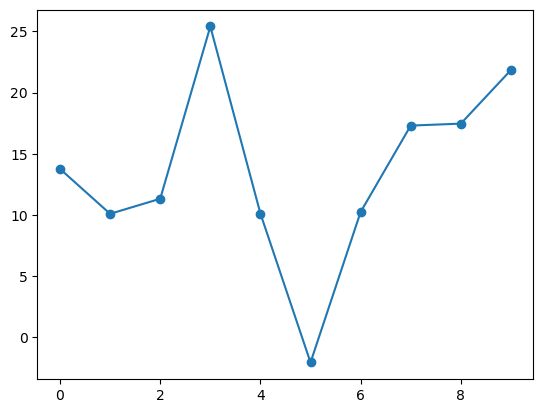



 Store                            17
Date            2011-01-07 00:00:00
Weekly_Sales             1083071.14
Holiday_Flag                      0
Temperature                    6.23
Fuel_Price                    2.891
CPI                      127.191774
Unemployment                  6.866
Name: 2336, dtype: object
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2331     17 2010-12-03     926573.81             0        22.47       2.812   
2332     17 2010-12-10     962475.55             0        31.64       2.817   
2333     17 2010-12-17    1049372.38             0        25.13       2.842   
2334     17 2010-12-24    1309226.79             0        26.58       2.846   
2335     17 2010-12-31     635862.55             1        20.79       2.868   
2336     17 2011-01-07    1083071.14             0         6.23       2.891   
2337     17 2011-01-14     758510.36             0        16.57       2.903   
2338     17 2011-01-21     755804.37             0 

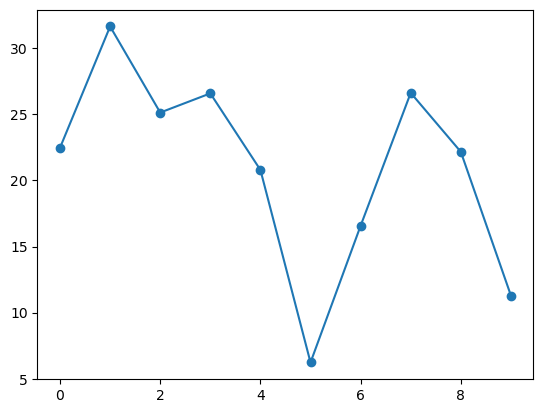



 Store                            26
Date            2011-01-28 00:00:00
Weekly_Sales              817485.14
Holiday_Flag                      0
Temperature                    5.54
Fuel_Price                    3.243
CPI                      133.105968
Unemployment                  7.907
Name: 3626, dtype: object
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3621     26 2010-12-24    1573982.47             0        21.81       3.150   
3622     26 2010-12-31     877268.29             1        18.73       3.177   
3623     26 2011-01-07     938149.21             0        21.13       3.193   
3624     26 2011-01-14     812323.29             0        16.70       3.215   
3625     26 2011-01-21     809833.21             0        12.98       3.232   
3626     26 2011-01-28     817485.14             0         5.54       3.243   
3627     26 2011-02-04     911807.02             0        11.17       3.240   
3628     26 2011-02-11    1010711.08             1 

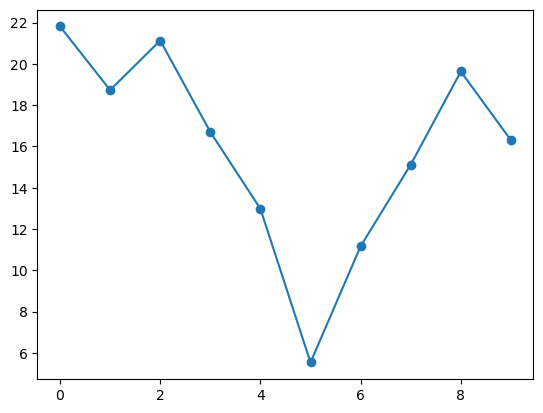

In [37]:
# we see that Unemployment move in regular pattern
# Make sure that temp. is not accurate
print(data.iloc[910]) # store 7
reg1=data[905:915]
print(reg1) # make sure same region
plt.scatter(range(len(reg1)),reg1["Temperature"])
plt.plot(range(len(reg1)),reg1["Temperature"])
plt.show()

print("\n\n",data.iloc[2336]) # store 17
reg2=data[2331:2341]
print(reg2) # make sure same region
plt.scatter(range(len(reg2)),reg2["Temperature"])
plt.plot(range(len(reg2)),reg2["Temperature"])
plt.show()

print("\n\n",data.iloc[3626]) # store 26
reg3=data[3621:3631]
print(reg3) # make sure same region
plt.scatter(range(len(reg3)),reg3["Temperature"])
plt.plot(range(len(reg3)),reg3["Temperature"])
plt.show()

In [38]:
# Manipulate temp. column by mean value of below and above values
data.loc[910,"Temperature"] = (data.loc[911,"Temperature"] + data.loc[909,"Temperature"]) / 2
data.loc[2336,"Temperature"] = (data.loc[2335,"Temperature"] + data.loc[2337,"Temperature"]) / 2
data.loc[3626,"Temperature"] = (data.loc[3625,"Temperature"] + data.loc[3627,"Temperature"]) / 2

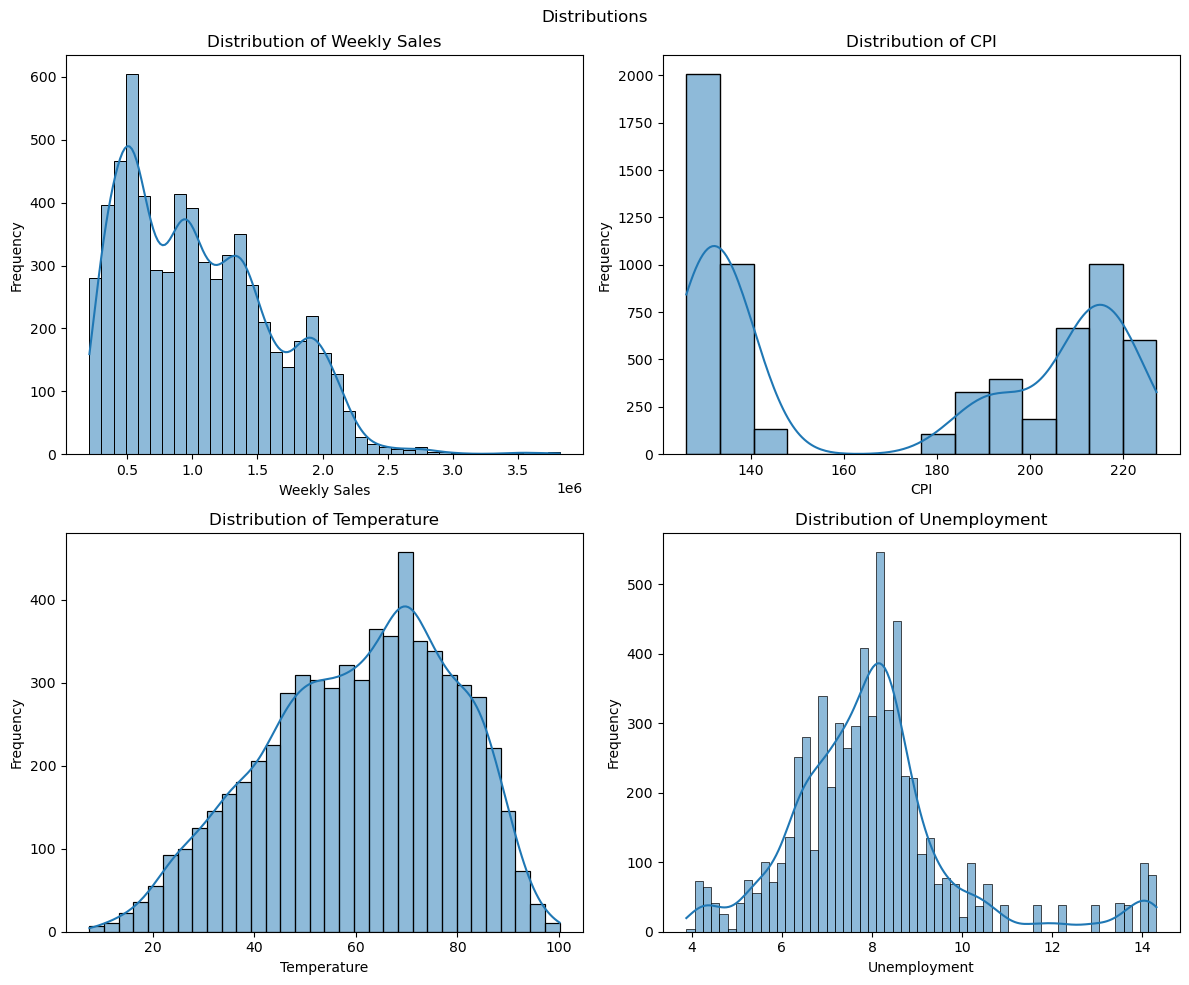

In [39]:
# Distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot a histogram for 'Weekly_Sales' 
sns.histplot(data['Weekly_Sales'], kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Weekly Sales')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Weekly Sales')

# Plot a histogram for 'CPI' 
sns.histplot(data['CPI'], kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('CPI')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of CPI')

# Plot a histogram for 'Temperature'
sns.histplot(data['Temperature'], kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Temperature')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Temperature')

# Plot a histogram for 'Unemployment' 
sns.histplot(data['Unemployment'], kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Unemployment')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Unemployment')

fig.suptitle("Distributions")
plt.tight_layout()
plt.show()

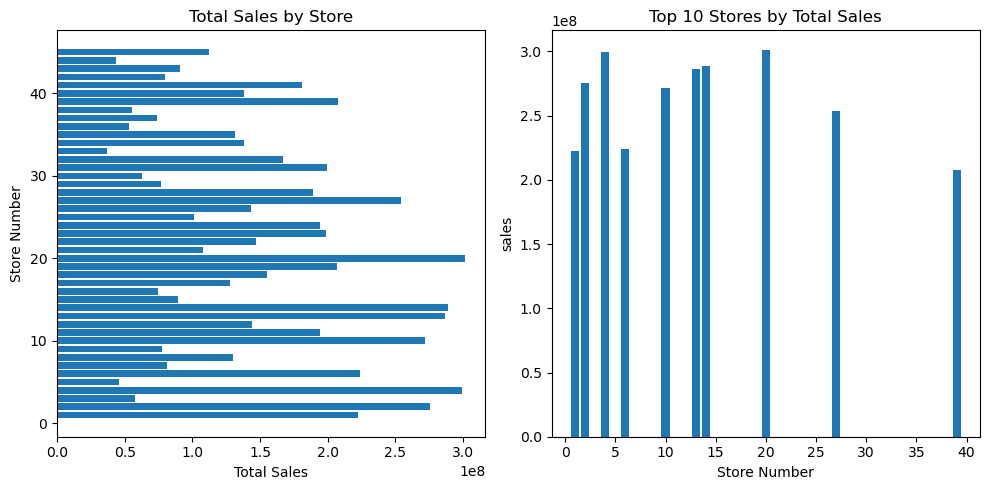

Highest store in total sales:


,total sales,store name
19,3.013978e+08,20


In [40]:
# sum all sales each store 
total_sales=[]
for i in range(1,46):
    total_sales.append(data[data.Store == i ]["Weekly_Sales"].sum())
store_total_sales = pd.DataFrame({
    'total sales': total_sales,
    'store name': range(1, 46)
}) 
# Total Sales by Store
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].barh(store_total_sales['store name'], store_total_sales['total sales'])
axs[0].set_xlabel('Total Sales')
axs[0].set_ylabel('Store Number')
axs[0].set_title('Total Sales by Store')

# Top ten stores sales
top_10_stores = store_total_sales.sort_values(by='total sales', ascending=False).head(10)
axs[1].bar(top_10_stores['store name'], top_10_stores['total sales'])
axs[1].set_xlabel('Store Number')
axs[1].set_ylabel('sales')
axs[1].set_title('Top 10 Stores by Total Sales')
plt.tight_layout()
plt.show()

# Highest store in sales
top_1 = store_total_sales.nlargest(1, 'total sales')
print("Highest store in total sales:")
top_1 


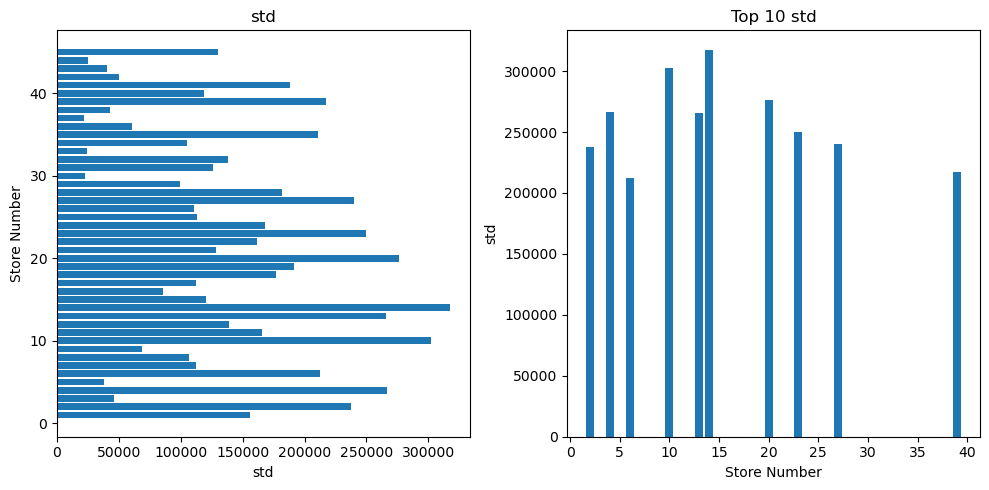

Highest std:


,std,store name
13,317569.949476,14


In [41]:
# std each store 
std=[]
for i in range(1,46):
    std.append(data[data.Store == i ]["Weekly_Sales"].std())
store_std = pd.DataFrame({
    'std': std,
    'store name': range(1, 46)
})

# Total std by Store
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].barh(store_std['store name'], store_std['std'])
axs[0].set_xlabel('std')
axs[0].set_ylabel('Store Number')
axs[0].set_title('std')

# Top ten std 
top_10_std= store_std.sort_values(by='std', ascending=False).head(10)
axs[1].bar(top_10_std['store name'], top_10_std['std'])
axs[1].set_xlabel('Store Number')
axs[1].set_ylabel('std')
axs[1].set_title('Top 10 std')
plt.tight_layout()
plt.show()

# Highest std
top_1 = store_std.nlargest(1, 'std')
print("Highest std:")
top_1 

The mean sales in the non-holiday season:  1041256.3802088555


 Holidays that have higher sales than the mean sales in the non-holiday 
       Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1         1 2010-02-12    1641957.44             1        38.51       2.548   
31        1 2010-09-10    1507460.69             1        78.69       2.565   
42        1 2010-11-26    1955624.11             1        64.52       2.735   
47        1 2010-12-31    1367320.01             1        48.43       2.943   
53        1 2011-02-11    1649614.93             1        36.39       3.022   
...     ...        ...           ...           ...          ...         ...   
5819     41 2011-12-30    1264014.16             1        34.12       3.119   
5825     41 2012-02-10    1238844.56             1        22.00       3.103   
5855     41 2012-09-07    1392143.82             1        67.41       3.596   
6334     45 2010-11-26    1182500.16             1        46.15       3.

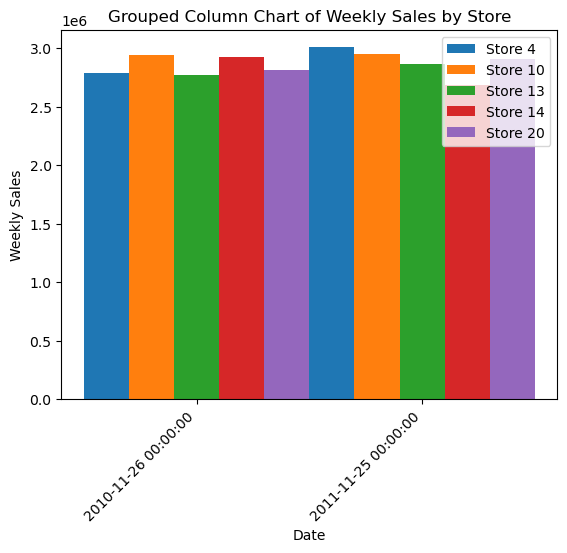

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143
1381,10,2011-11-25,2950198.64,1,60.68,3.760,129.836400,7.874
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003
1901,14,2010-11-26,2921709.71,1,46.15,3.039,182.783277,8.724
2811,20,2011-11-25,2906233.25,1,46.38,3.492,211.412076,7.082
1810,13,2011-11-25,2864170.61,1,38.89,3.445,129.836400,6.392
2759,20,2010-11-26,2811634.04,1,46.66,3.039,204.962100,7.484
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
1758,13,2010-11-26,2766400.05,1,28.22,2.830,126.669267,7.795
1953,14,2011-11-25,2685351.81,1,48.71,3.492,188.350400,8.523


In [42]:
# holidays data
holidays_data=data[data.Holiday_Flag==1]
# Mean of sales of non-holidays
nonholidays_mean=data[data.Holiday_Flag==0]["Weekly_Sales"].mean()
print("The mean sales in the non-holiday season: ",nonholidays_mean)
print("\n\n Holidays that have higher sales than the mean sales in the non-holiday \n",holidays_data[holidays_data.Weekly_Sales>nonholidays_mean])

# Grouped column chart
top_10_holidays= holidays_data.sort_values(by='Weekly_Sales', ascending=False).head(10)
# Group data by 'Store' and 'Date'
grouped_data = top_10_holidays.groupby(['Store', 'Date']).sum().reset_index()
stores = grouped_data['Store'].unique()
dates = grouped_data['Date'].unique()

bar_width = 0.2
x_positions = np.arange(len(dates))


for i, store in enumerate(stores):
    store_data = grouped_data[grouped_data['Store'] == store]        
    plt.bar(
        x_positions + i * bar_width,
        store_data['Weekly_Sales'],
        width=bar_width,
        label=f'Store {store}'
    )


plt.xticks(x_positions + bar_width * (len(stores) - 1) / 2, dates, rotation=45, ha='right')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Grouped Column Chart of Weekly Sales by Store')
plt.show()

top_10_holidays


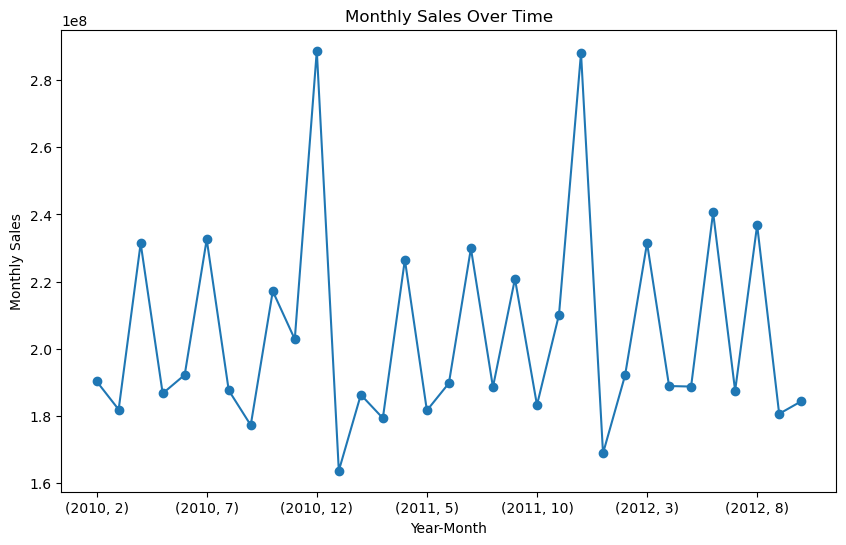

Highest monthly sales:


Date  Date
2010  12      2.887605e+08
Name: Weekly_Sales, dtype: float64

In [43]:
# Group data by year and month
grouped_by_month = data.groupby([data['Date'].dt.year, data['Date'].dt.month])

monthly_sales=grouped_by_month['Weekly_Sales'].sum()
monthly_sales

# Plot the monthly sales
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.show()

# Highest std
top1 = monthly_sales.nlargest(1)
print("Highest monthly sales:")
top1

Date  Semester
2010  1           9.826223e+08
      2           1.306264e+09
2011  1           1.127340e+09
      2           1.320860e+09
2012  1           1.210765e+09
      2           7.893674e+08
Name: Weekly_Sales, dtype: float64


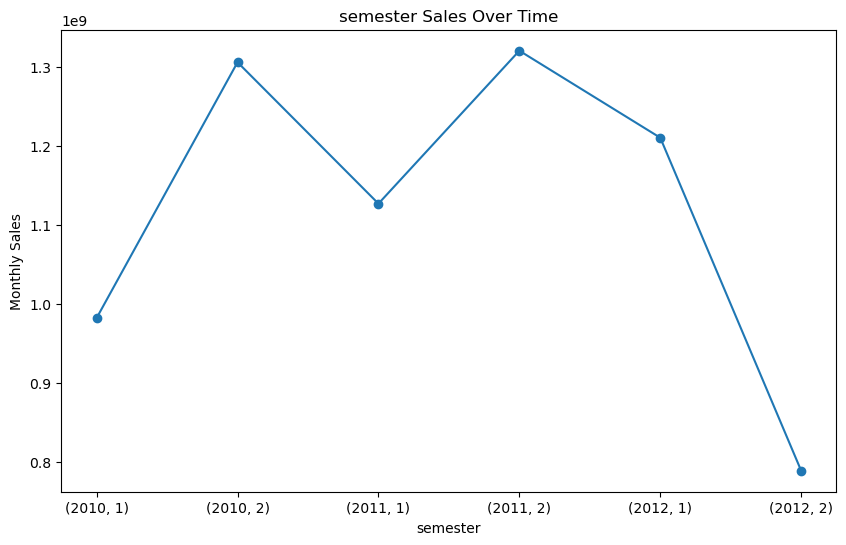

Highest semester sales:


Date  Semester
2011  2           1.320860e+09
Name: Weekly_Sales, dtype: float64

In [44]:
# semester function
def semester(date):
    if date.month in range(1, 7):
        return 1  
    else:
        return 2  

# Add semester column
data['Semester'] = data['Date'].apply(semester)

# Group data by year and semester
grouped_by_semester = data.groupby([data['Date'].dt.year, data['Semester']])

semester_sales = grouped_by_semester['Weekly_Sales'].sum()
print(semester_sales)


# Plot the semester sales
semester_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('semester')
plt.ylabel('Monthly Sales')
plt.title('semester Sales Over Time')
plt.show()

# Highest semester
top1 = semester_sales.nlargest(1)
print("Highest semester sales:")
top1

In [45]:
data.corr()  # There is no linear relations

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Semester
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022839,0.060023,-0.209492,0.223531,-6.588451e-16
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145332,0.771444,0.077157,-0.248203,1.616174e-01
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063963,0.009464,-0.072634,-0.106176,3.934578e-02
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155279,-0.078347,-0.002162,0.010960,1.116019e-01
Temperature,-2.283886e-02,1.453324e-01,-0.063963,-1.552793e-01,1.000000,0.144891,0.176900,0.101212,2.900998e-01
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144891,1.000000,-0.170642,-0.034684,-7.681410e-02
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176900,-0.170642,1.000000,-0.302020,5.559948e-03
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101212,-0.034684,-0.302020,1.000000,-2.232654e-02
Semester,-6.588451e-16,1.616174e-01,0.039346,1.116019e-01,0.290100,-0.076814,0.005560,-0.022327,1.000000e+00


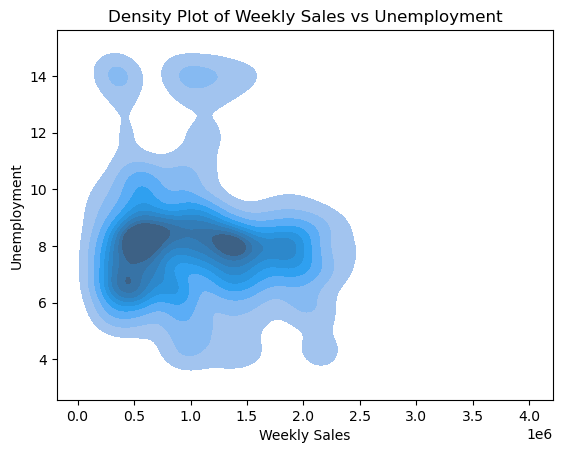

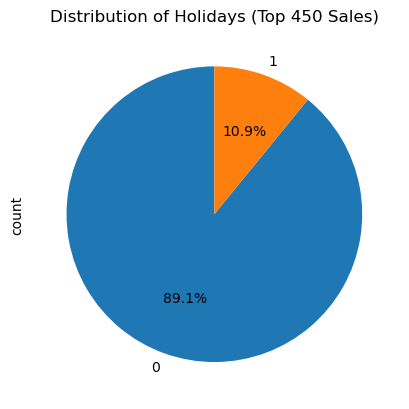

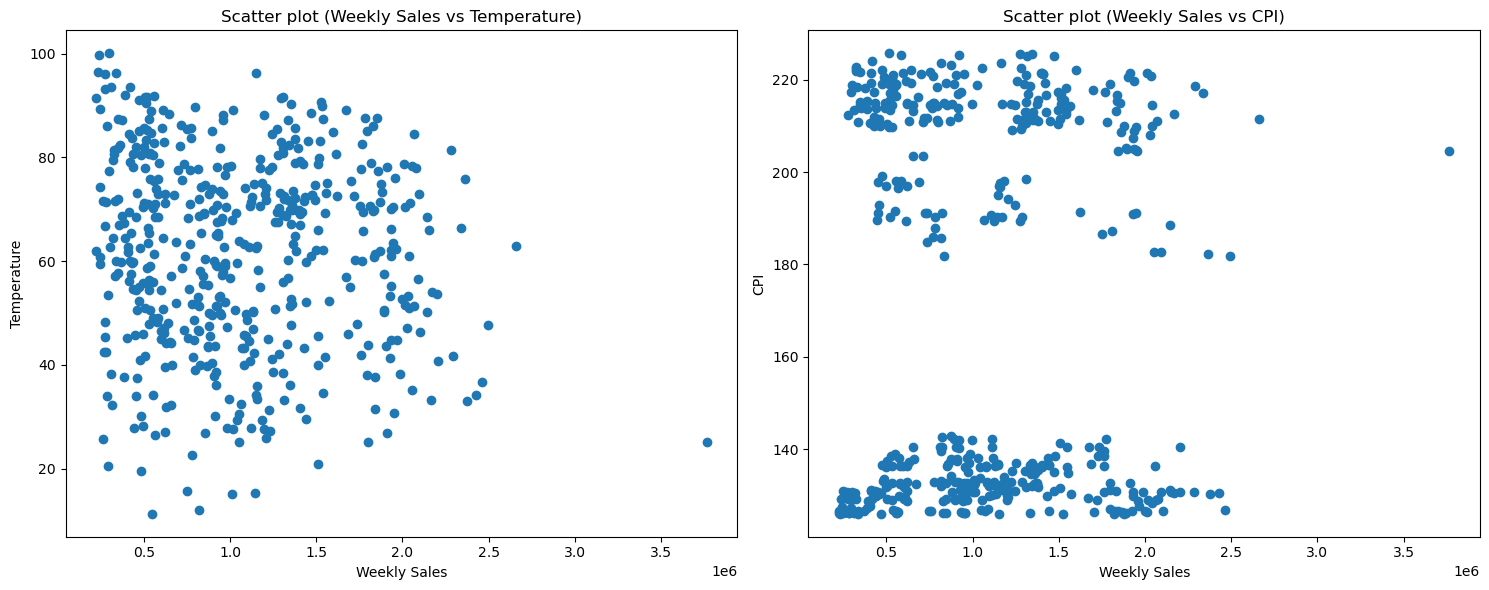

In [75]:
warnings.filterwarnings("ignore", category=FutureWarning)

#  density plot bet. Weekly_Sales and Unemployment
sns.kdeplot(data=data, x='Weekly_Sales', y='Unemployment', fill=True)
plt.xlabel('Weekly Sales')  # Highest weekly sales is when unemployment is moderate
plt.ylabel('Unemployment')  # when unempolyment is high weekly sales be moderate
plt.title('Density Plot of Weekly Sales vs Unemployment')
plt.show()

# top 450 sales cause we have 450 holiday in data (10x45)
top_450 = data.sort_values(by='Weekly_Sales', ascending=False).head(450)
counts = top_450['Holiday_Flag'].value_counts()  # only 10.9% of top 450 sales is in holidays
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Holidays (Top 450 Sales)')
plt.show()

# sample data (500)
sample = data.sample(n=500, random_state=42)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Relation between weekly sales and temp (sampled data)
axs[0].scatter(sample['Weekly_Sales'], sample['Temperature'])
axs[0].set_xlabel('Weekly Sales')  # Highest weekly sales the temp is in first quarter
axs[0].set_ylabel('Temperature')   # Highest temp has low weekly sales
axs[0].set_title('Scatter plot (Weekly Sales vs Temperature)')

# Relation between weekly sales and CPI (sampled data)
axs[1].scatter(sample['Weekly_Sales'], sample['CPI'])
axs[1].set_xlabel('Weekly Sales')  # Highest weekly sales the CPI is high
axs[1].set_ylabel('CPI')
axs[1].set_title('Scatter plot (Weekly Sales vs CPI)')

plt.tight_layout()
plt.show()